# Image Processing Laboratory
## Test 2
18th March 2021

#### Q1. Write a function to implement 2D convolution of 2 matrices of size m1 ∗ n1 and m2 ∗ n2. Illustrate with a suitable example. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def convolve_2D(image, kernel):
    return ccorrelation_2d(image, np.flipud(np.fliplr(kernel)))

def ccorrelation_2d(image, kernel):
    
    #Define the padding to be done
    paddingl = kernel.shape[0] - 1
    paddingu = kernel.shape[1] - 1

    # Apply Padding to All Sides based on the calculated values
    imagePadded = np.pad(image, ((paddingl, paddingl), (paddingu, paddingu)))

    # Define the output matrix 
    outx = int(((image.shape[0] - kernel.shape[0] + 2 * paddingl) ) + 1)
    outy = int(((image.shape[1] - kernel.shape[1] + 2 * paddingu) ) + 1)
    out = np.zeros((outx, outy))

    # Iterate through image
    for y in range(outy):
        for x in range(outx):
            out[x, y] = np.sum(kernel * imagePadded[x: x + kernel.shape[0], y: y + kernel.shape[1]])
    return out

Example 1

In [3]:
img1 = np.array([[i+j for j in range(4)]for i in range(5)])
print(img1.shape)
print(img1)

(5, 4)
[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]]


In [4]:
img2 = img1.reshape([2, 10])
print(img2.shape)
print(img2)

(2, 10)
[[0 1 2 3 1 2 3 4 2 3]
 [4 5 3 4 5 6 4 5 6 7]]


In [5]:
print("IMG1 * IMG2")
print(convolve_2D(img1, img2))

IMG1 * IMG2
[[  0.   0.   1.   4.  10.  13.  13.  10.  16.  19.  19.  12.   9.]
 [  0.   5.  17.  35.  42.  43.  50.  51.  58.  59.  62.  49.  33.]
 [  4.  15.  32.  57.  66.  69.  78.  81.  90.  93.  89.  67.  43.]
 [  8.  25.  47.  79.  90.  95. 106. 111. 122. 127. 116.  85.  53.]
 [ 12.  35.  62. 101. 114. 121. 134. 141. 154. 161. 143. 103.  63.]
 [ 16.  40.  61.  89.  93.  94. 104. 111. 115. 116. 106.  84.  49.]]


Example 2

In [6]:
img2 = np.eye(3) + 1
print(img2)

[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]


In [7]:
print("IMG1 * IMG2")
print(convolve_2D(img1, img2))

IMG1 * IMG2
[[ 0.  2.  5.  9.  5.  3.]
 [ 2.  6. 13. 21. 15.  7.]
 [ 5. 13. 24. 36. 27. 15.]
 [ 9. 21. 36. 48. 35. 19.]
 [13. 29. 48. 60. 43. 23.]
 [ 7. 20. 35. 43. 36. 19.]
 [ 4.  9. 19. 23. 19. 14.]]


#### Q4. Design a spatial domain filter to preserve only the high frequency information in the below image.

In [8]:
img = np.array([[2] * 4, [8] * 4] * 2)
print(img)

[[2 2 2 2]
 [8 8 8 8]
 [2 2 2 2]
 [8 8 8 8]]


We are using the below 3x3 high pass filter to retain the high frequency information while reducing the low frequency information in the spatial domain.

In [9]:
filter = np.ones((3, 3)) / 9
filter[1, 1] = -8/9
filter = -filter
print(filter)

[[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  0.88888889 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]


In [10]:
print(convolve_2D(img, filter))

[[-0.22222222 -0.44444444 -0.66666667 -0.66666667 -0.44444444 -0.22222222]
 [-1.11111111 -0.22222222 -1.33333333 -1.33333333 -0.22222222 -1.11111111]
 [-1.33333333  5.33333333  4.          4.          5.33333333 -1.33333333]
 [-2.         -2.         -4.         -4.         -2.         -2.        ]
 [-1.11111111  5.77777778  4.66666667  4.66666667  5.77777778 -1.11111111]
 [-0.88888889 -1.77777778 -2.66666667 -2.66666667 -1.77777778 -0.88888889]]


Another 5x5 high pass filter is used to illustrate the same 

In [11]:
filter5 = np.array([[0, -1, -1, -1, 0], [-1, 2, -4, 2, -1], [-1, -4, 13, -4, -1], [-1, 2, -4, 2, -1], [0, -1, -1, -1, 0]])/25
print(filter5)

[[ 0.   -0.04 -0.04 -0.04  0.  ]
 [-0.04  0.08 -0.16  0.08 -0.04]
 [-0.04 -0.16  0.52 -0.16 -0.04]
 [-0.04  0.08 -0.16  0.08 -0.04]
 [ 0.   -0.04 -0.04 -0.04  0.  ]]


In [12]:
print(convolve_2D(img, filter5))

[[ 0.   -0.08 -0.16 -0.24 -0.24 -0.16 -0.08  0.  ]
 [-0.08 -0.24 -0.88 -1.04 -1.04 -0.88 -0.24 -0.08]
 [-0.4  -0.16 -0.48 -0.24 -0.24 -0.48 -0.16 -0.4 ]
 [-0.48 -1.76  1.44  0.16  0.16  1.44 -1.76 -0.48]
 [-0.72  0.16 -1.44 -0.56 -0.56 -1.44  0.16 -0.72]
 [-0.4  -1.84  1.68  0.24  0.24  1.68 -1.84 -0.4 ]
 [-0.32  0.24 -1.12 -0.56 -0.56 -1.12  0.24 -0.32]
 [ 0.   -0.32 -0.64 -0.96 -0.96 -0.64 -0.32  0.  ]]


#### Q5. Verify the effect of an n ∗ n averaging filter on the below image. Show the resultant images for n = 3, 5, 7, and 11 and 25. Report your observations. 

We are applying the basic averaging n*n filter of the given sizes on the given image

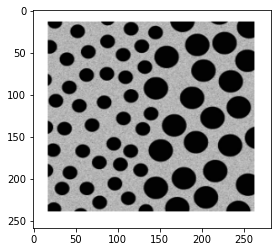

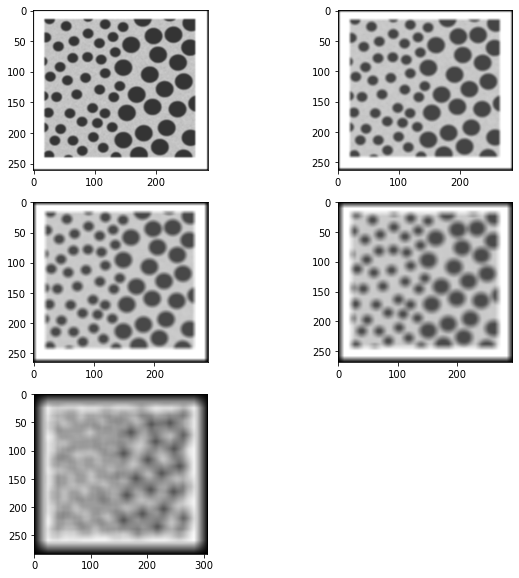

In [13]:
img = cv2.imread("b.png", cv2.IMREAD_GRAYSCALE)
fig = plt.figure()
plt.imshow(img, cmap='gray')
fig = plt.figure(figsize = (10, 10))  
i = 1
for N in [3, 5, 7, 11, 25]:
  avgFilter = np.ones((N, N)) / (N ** 2)
  plt.subplot(3, 2, i)
  i += 1
  plt.imshow(convolve_2D(img, avgFilter), cmap='gray', vmax = 255)

As we increase the filter size, the neighbourhood of the averaging increases and thus the smoothening increases. 